## Machine Learning Engineer Nanodegree
### Capstone Project



   ##                       Predict the customer's loyalty socre for the ELO 

#### To accomplish this projecet ,there are several steps have to be done in order to predict the customers' score:

### step 0: import the data and ncessary libraries for the project 

In [1]:
# Import the necessarylibraries ffor this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix



In [2]:
cd all

/Users/Tiger/Documents/GitHub/Machine-Learning/machine-learning/projects/capstone/all


### Step 1: Data Exploration and visulization:

In [3]:
#load the data the historical data set

data = pd.read_csv('historical_transactions.csv')






In [4]:
print("Historical transactions  dataset has {} data points with {} variables each.".format(*data.shape))

Historical transactions  dataset has 29112361 data points with 14 variables each.


In [5]:
data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
data.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


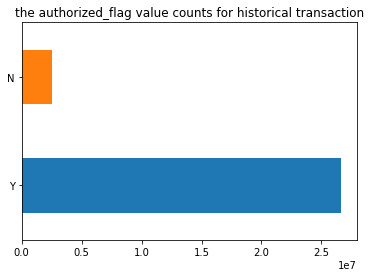

In [7]:
# we want to get the count values of the authorized transactions for the historical data set
data['authorized_flag'].value_counts().plot(kind='barh', title='the authorized_flag value counts for historical transaction');

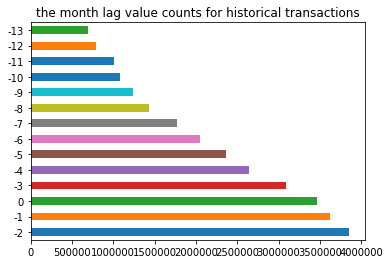

In [8]:
# we want to get the count values of the month lag  for the historical data set
data['month_lag'].value_counts().plot(kind='barh', title='the month lag value counts for historical transactions');

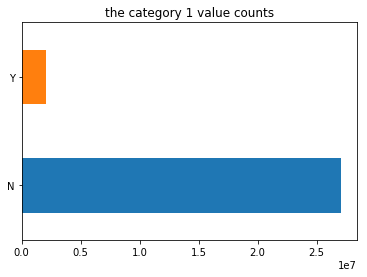

In [9]:
data['category_1'].value_counts().plot(kind='barh',title= 'the category 1 value counts')


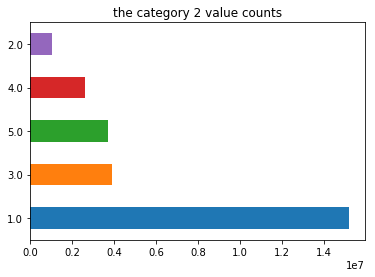

In [10]:
data['category_2'].value_counts().plot(kind='barh',title= 'the category 2 value counts')


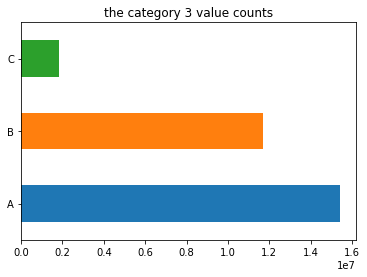

In [11]:
data['category_3'].value_counts().plot(kind='barh',title= 'the category 3 value counts')

In [12]:
# check if there is null values or not 
print(data.isnull().sum())

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64


In [13]:
# as can be seen above there are some null values for the category_3 and 2 and merchant_i which will be handeled later if needed

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.patches.Patch object at 0x114f1a940> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


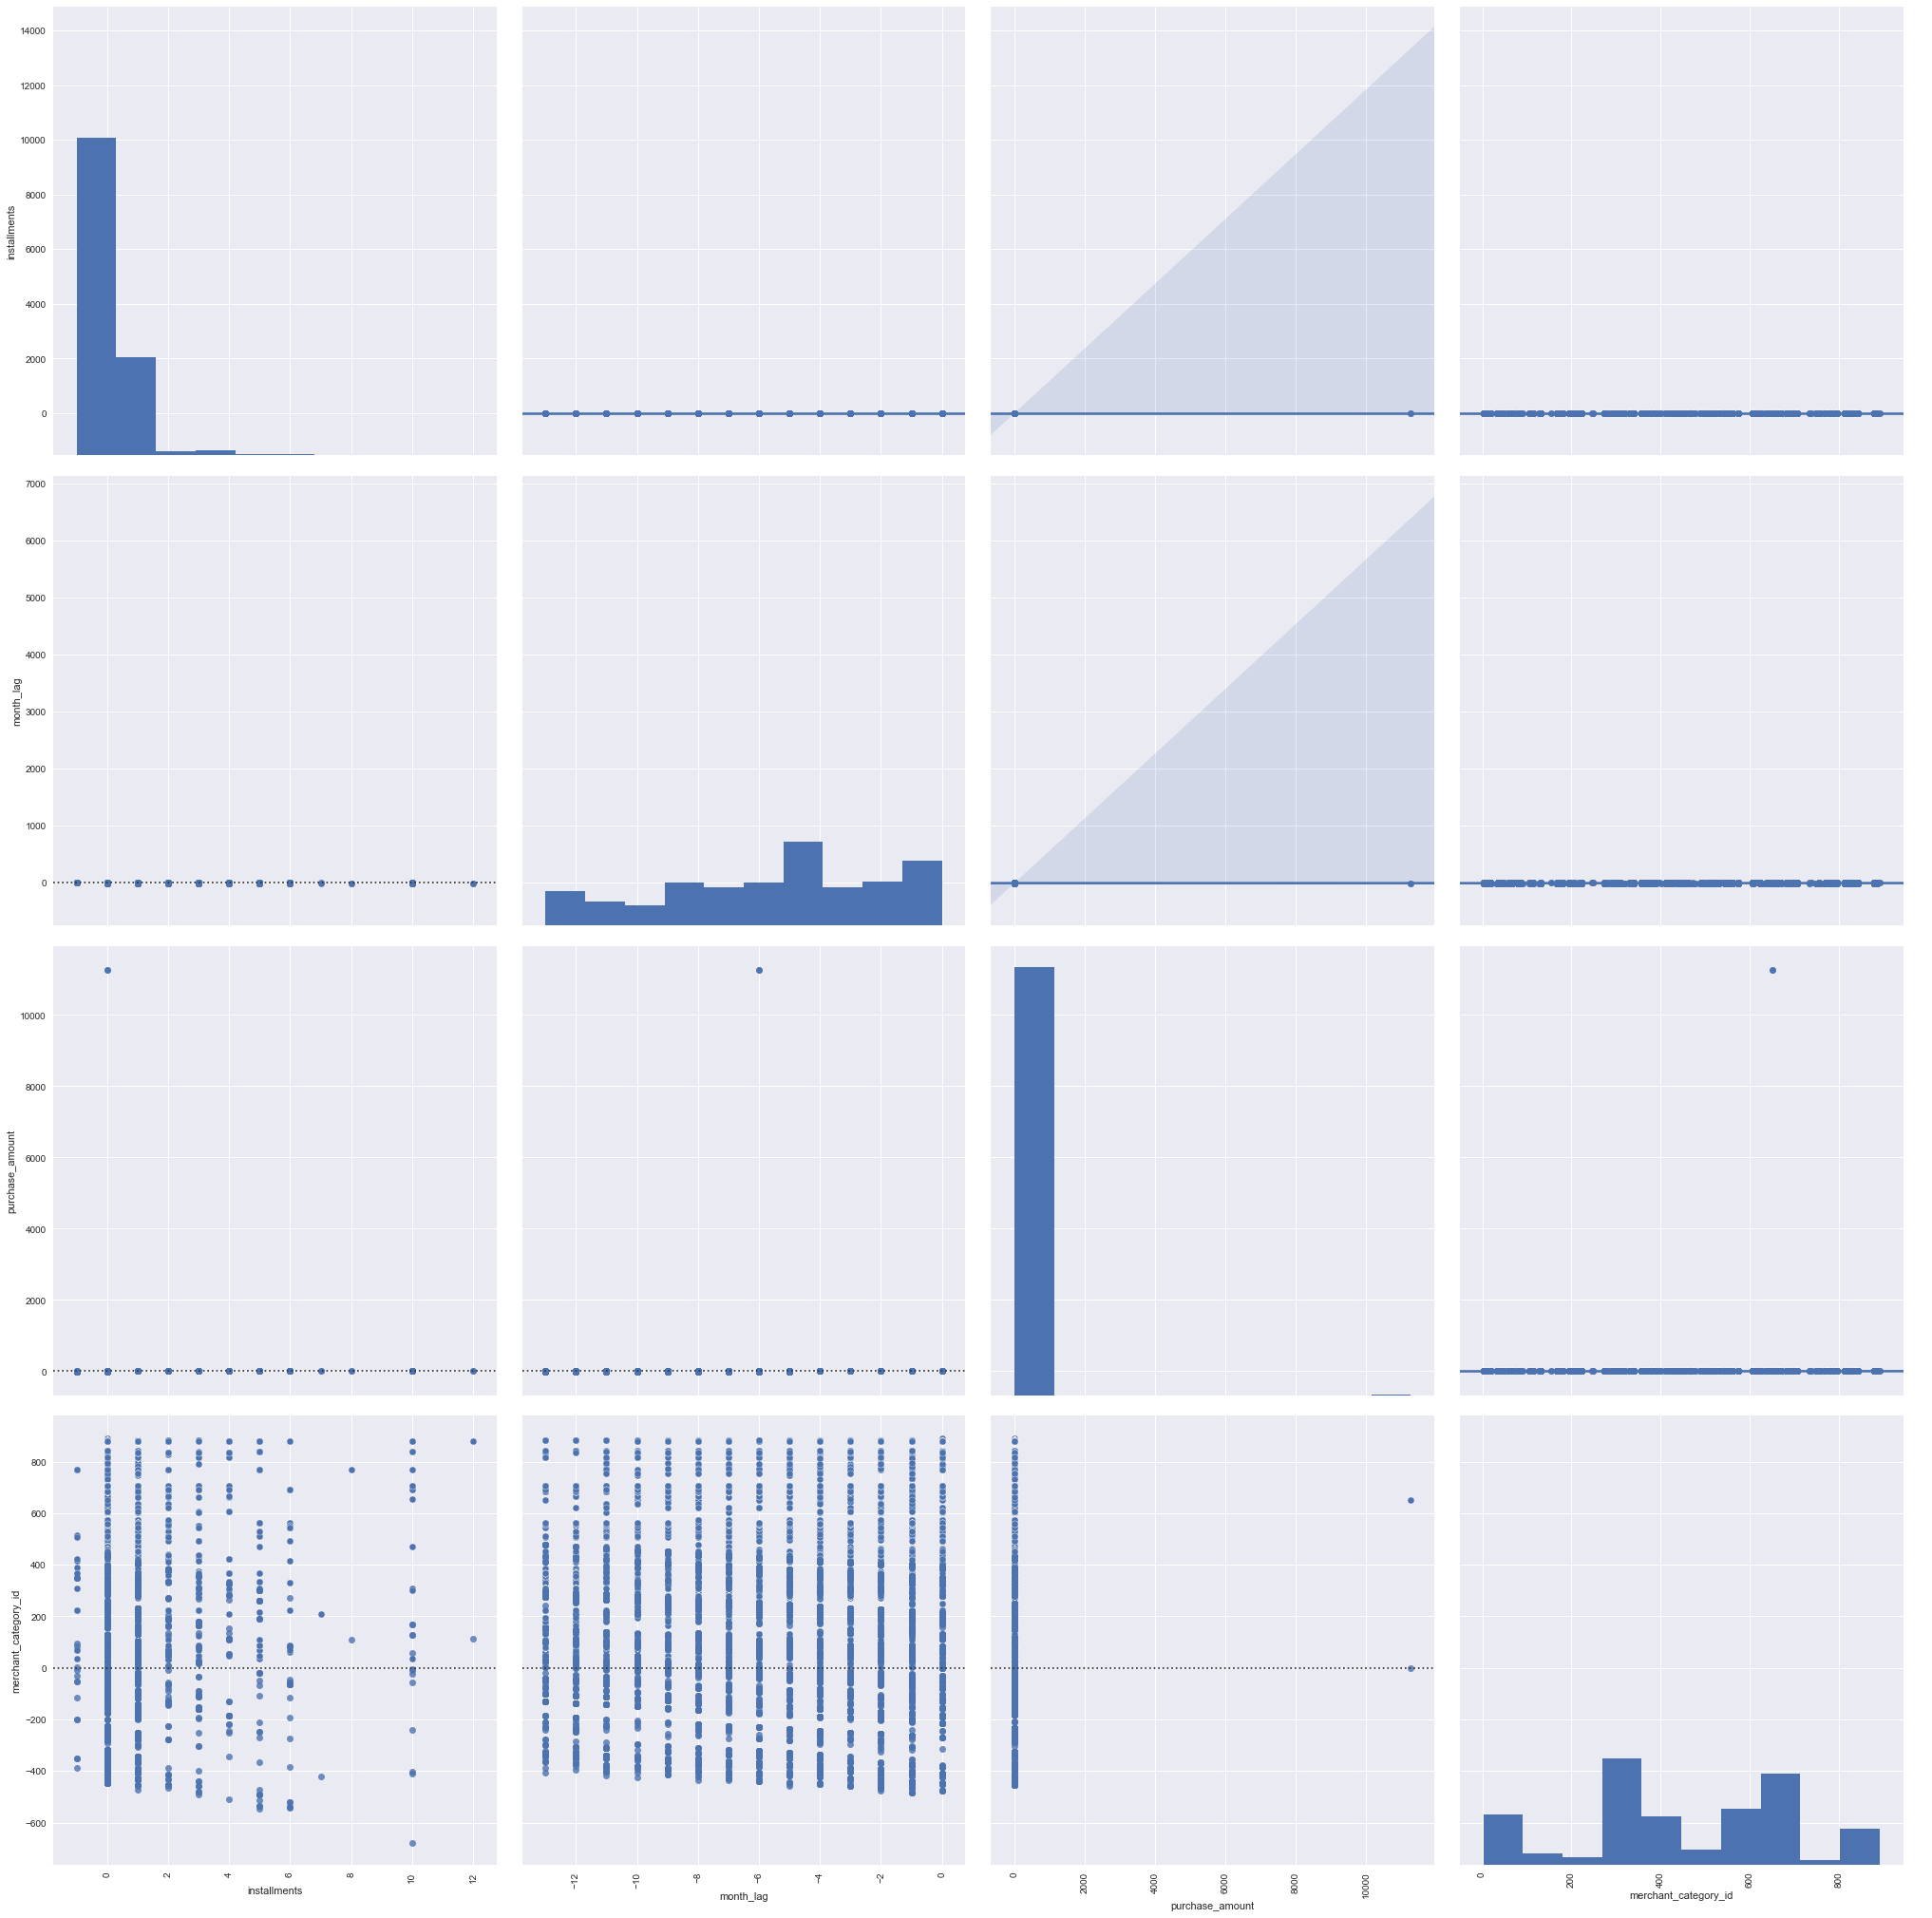

In [15]:
sns.set(font_scale=2)
data_graph = sns.pairplot(data1[["authorized_flag","installments", "month_lag", "purchase_amount", "category_1","merchant_category_id"]],size=7)  
data_graph.map_upper(sns.regplot)  
data_graph.map_lower(sns.residplot)  
data_graph.map_diag(plt.hist)  
for g in data_graph.axes.flat:  
    plt.setp(g.get_xticklabels(), rotation=90)
data_graph.add_legend()  
data_graph.set(alpha=0.4)

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.patches.Patch object at 0x1a1ef85ac8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


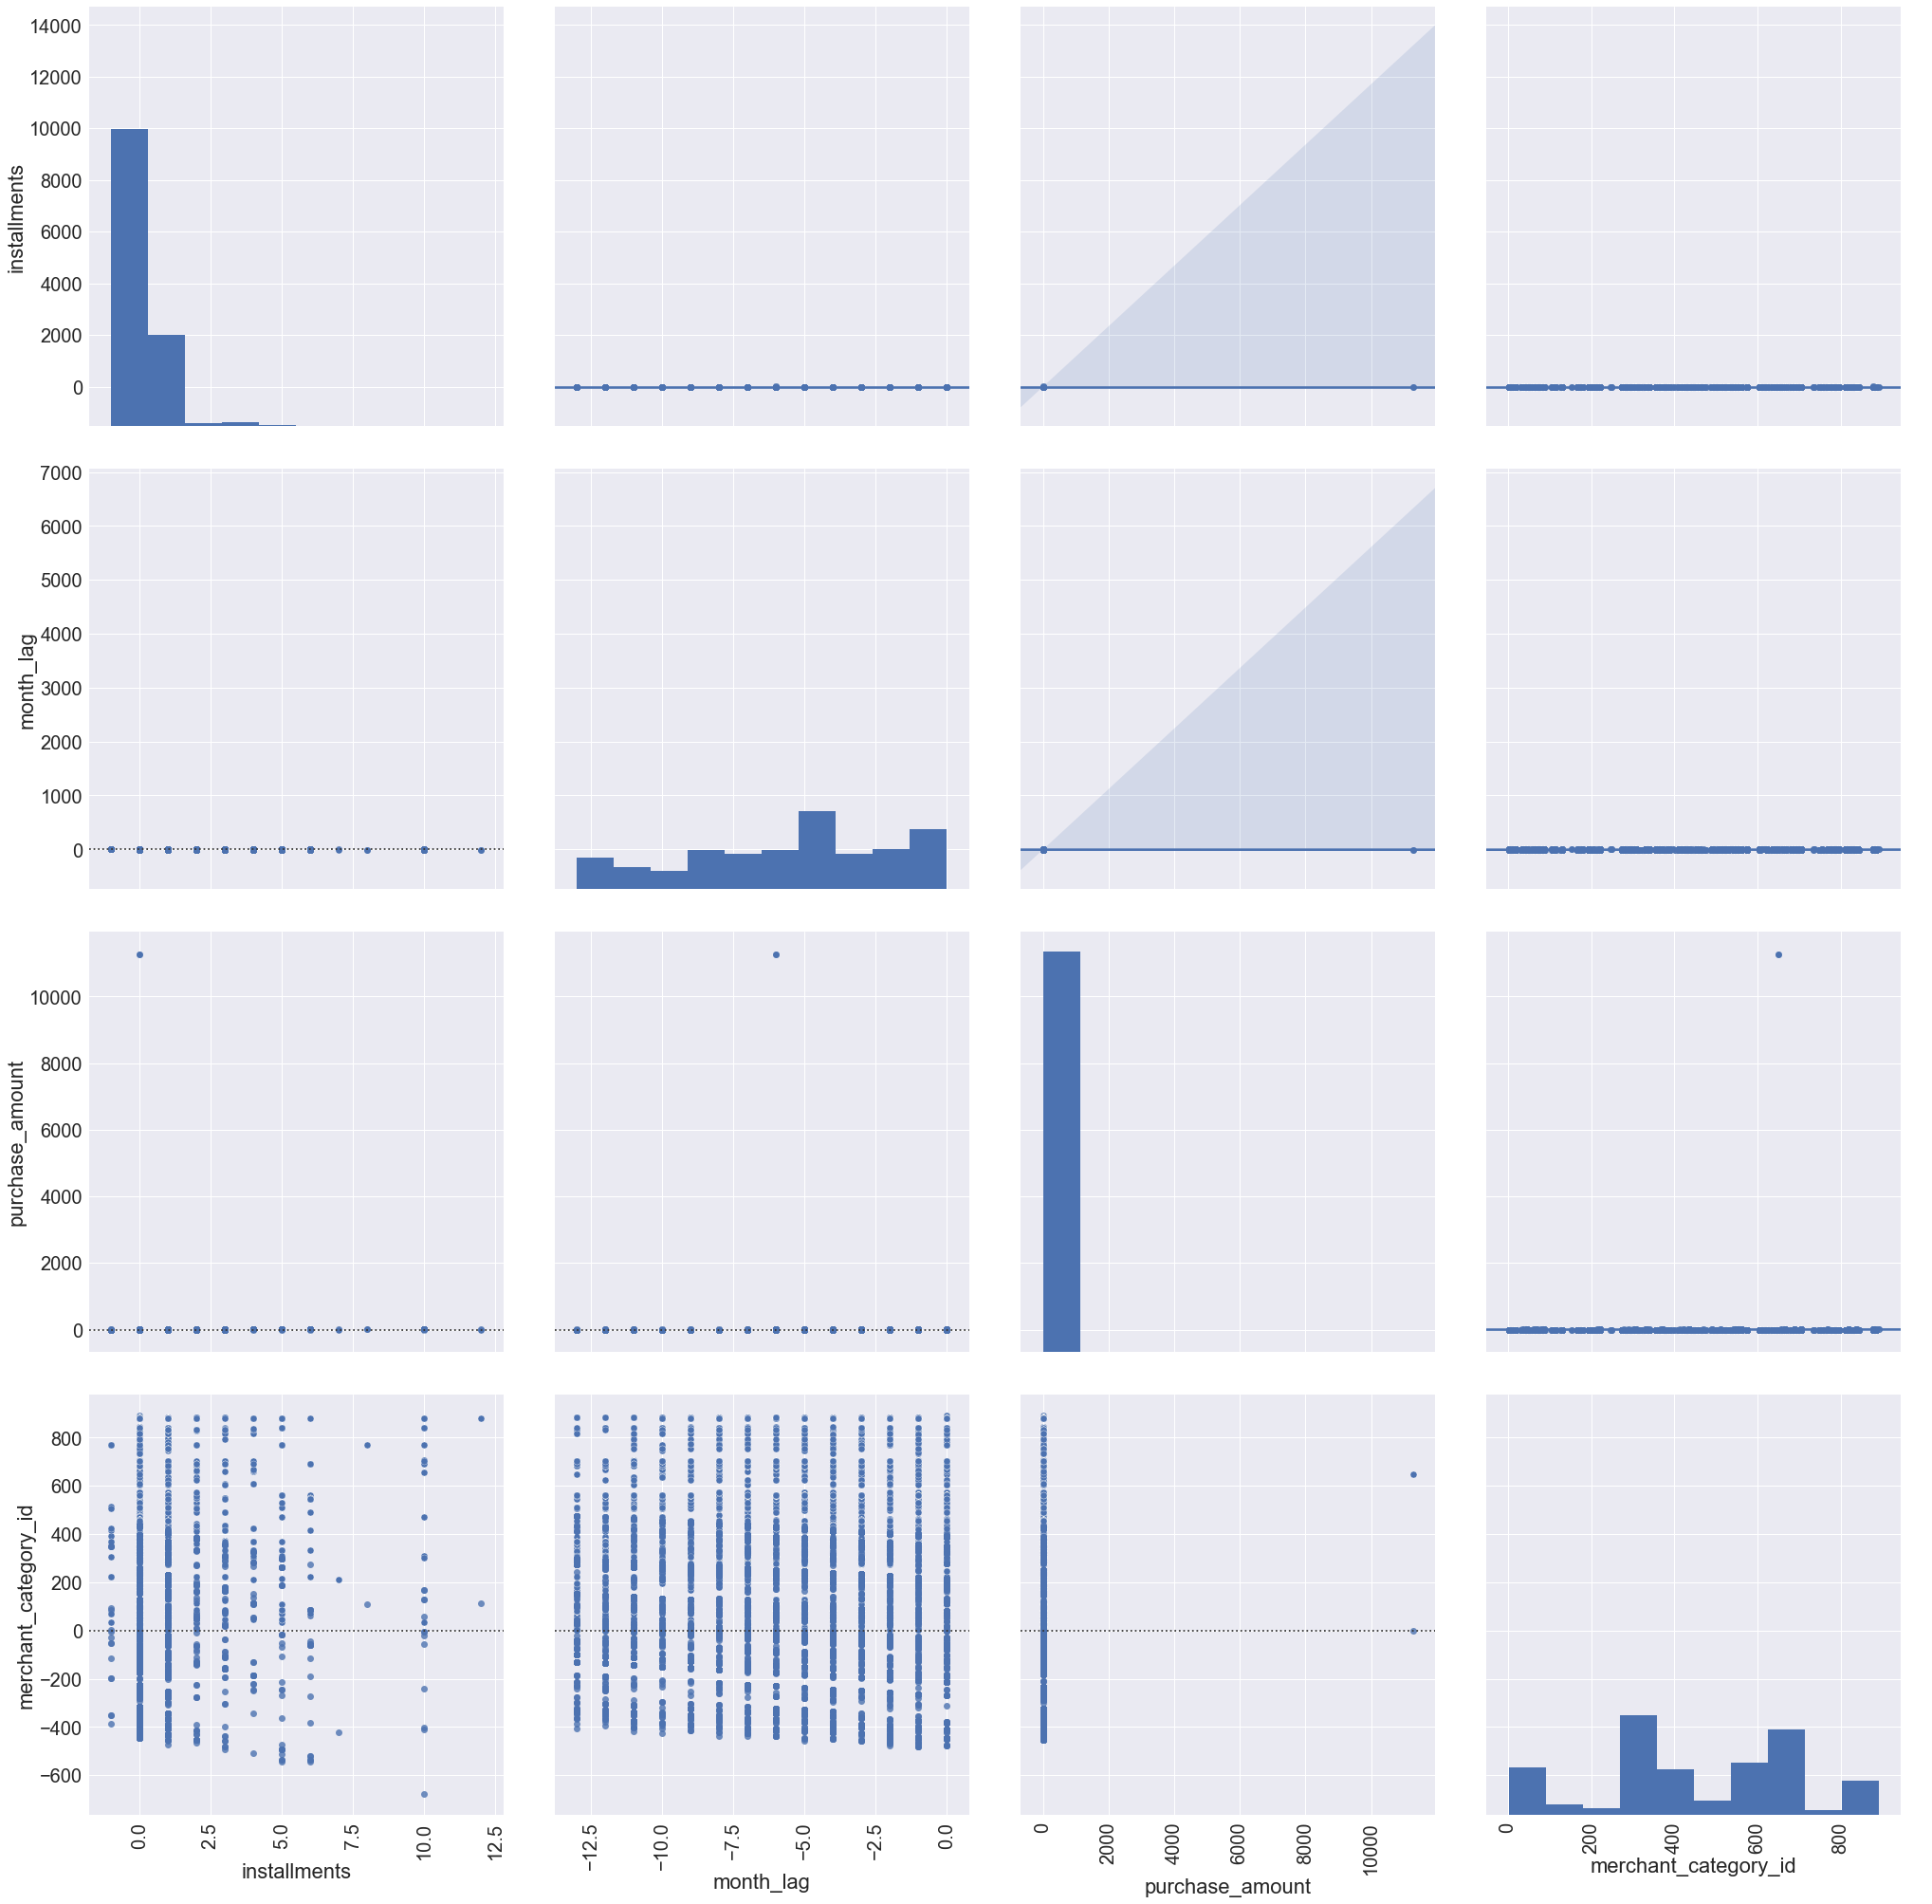

In [76]:

sns.set(font_scale=2)
data_graph = sns.pairplot(data1[["authorized_flag","installments", "month_lag", "purchase_amount", "category_1","merchant_category_id"]],size=7)  
data_graph.map_upper(sns.regplot)  
data_graph.map_lower(sns.residplot)  
data_graph.map_diag(plt.hist)  
for g in data_graph.axes.flat:  
    plt.setp(g.get_xticklabels(), rotation=90)
data_graph.add_legend()  
data_graph.set(alpha=0.4)


In [16]:
#explore the new merchant transaction that was given in the same competition. 
new_merchant_transc= pd.read_csv('new_merchant_transactions.csv')

In [17]:
print("new_merchant_transc dataset has {} data points with {} variables each.".format(*new_merchant_transc.shape))

new_merchant_transc dataset has 1963031 data points with 14 variables each.


In [18]:
new_merchant_transc.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


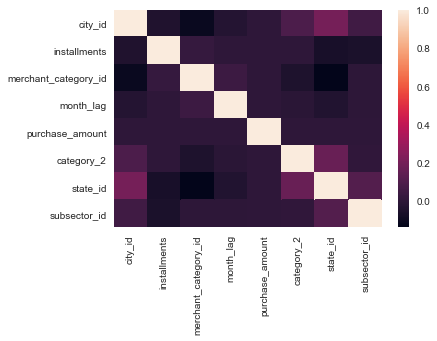

In [19]:

# explore the correlation between the features and calculate the correlation matrix
cor = data.corr()

# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

In [20]:
# AS CAN BE SEEN ABOVE THERE IS NO STRONG correlation BETWEEN THE GIVEN FEATURES 

In [21]:
# load the train data set
train= pd.read_csv("train.csv")

In [22]:
print("training dataset has {} data points with {} variables each.".format(*train.shape))

training dataset has 201917 data points with 6 variables each.


In [23]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [24]:
# load the test set
test=pd.read_csv('test.csv')

print("testing dataset has {} data points with {} variables each.".format(*test.shape))

testing dataset has 123623 data points with 5 variables each.


In [25]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [26]:
# explore the data types 
data.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

### Step 2: Data cleansing and preparation.

The data types for purchase date is not date date type and it has to be changed for further using for all datasets.

In [27]:
# change the data type for the purchase date.
data['purchase_date'] = pd.to_datetime(data['purchase_date'])

In [28]:
# change the date data type for both data set
train['first_active_month'] = pd.to_datetime(train['first_active_month'])
test['first_active_month'] = pd.to_datetime(test['first_active_month'])

In [29]:
train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

In [30]:
test.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
dtype: object

In [31]:
# check if there is null values in the train data set 
print(train.isnull().sum())

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64


##### As can be seen above ,we have changed the data types for purchase date to date and we checked the nulls for training data set and there is no nulls , So we can go further more step to implement the model and select the right algorithm to predict the loyalty score for the customers.

### Step 3: Model selection and evaluate the algorithm.

In [32]:
# load all necessaary libraries for linear regression algorithm to apply to our training data set and test on the test dataset 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
# we used train test split function and we choose the test size 20  and the random state is 300
X_train, X_test, y_train, y_test = train_test_split(train[['feature_1','feature_2','feature_3']],train['target'], 
                                                  test_size=0.2, random_state=300)

### apply the linear regression and check the root mean squared error 

linear_model = LinearRegression().fit(X_train,y_train)

## apply the linear regression on the training set and get the root mean squared error for this set.
predition = linear_model.predict(X_train)
print("The Root Mean squared error for the training set is : %.2f" % np.sqrt(mean_squared_error(y_train, predition)))




The Root Mean squared error for the training set is : 3.86


In [34]:
## apply the linear regression on the testing set and get the root mean squared error for this set.
predition = linear_model.predict(X_test)
print("The Root Mean squared error for the testing set is : %.2f" % np.sqrt(mean_squared_error(y_test, predition)))



The Root Mean squared error for the testing set is : 3.81


As can be seen above The Root Mean squared error is 3.81 which is very high.

##### in the below step we generate a file that our model prediction for the customers' loyalty score 

In [35]:

# in the below code we want to the liner model to predict the customer loyalty score based on the above model for the test data set and generate the prediction file to csv file 
y_test = linear_model.predict(test[['feature_1', 'feature_2', 'feature_3']])
prediction_submission = pd.DataFrame({"card_id": test["card_id"].values})
prediction_submission['target'] = y_test
prediction_submission.to_csv('elo_submission.csv',index=False)

In [36]:

result= pd.read_csv('elo_submission.csv')

In [37]:

result.head()

,card_id,target
0,C_ID_0ab67a22ab,-0.436521
1,C_ID_130fd0cbdd,-0.405767
2,C_ID_b709037bc5,-0.448921
3,C_ID_d27d835a9f,-0.316441
4,C_ID_2b5e3df5c2,-0.448921


### Step 4: Model tunning and feature engineering.

 
 For the model tunning , it is important to do some features engineering by adding some features to the train data set from the historical transactions to improve the model and reduce the root mean sequred error of our model. 

In [38]:
## It is important to do some refinments to add some features to train data set from the historical transaction data set and merchant


new_train = pd.merge(train, data , how = 'inner', left_on = ['card_id'], right_on=['card_id'])

In [39]:
new_train.head(5)


,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37


In [40]:
new_train.dtypes

first_active_month      datetime64[ns]
card_id                         object
feature_1                        int64
feature_2                        int64
feature_3                        int64
target                         float64
authorized_flag                 object
city_id                          int64
category_1                      object
installments                     int64
category_3                      object
merchant_category_id             int64
merchant_id                     object
month_lag                        int64
purchase_amount                float64
purchase_date           datetime64[ns]
category_2                     float64
state_id                         int64
subsector_id                     int64
dtype: object

In [41]:
# check if there is any null values 
print( new_train.isnull().sum())

first_active_month            0
card_id                       0
feature_1                     0
feature_2                     0
feature_3                     0
target                        0
authorized_flag               0
city_id                       0
category_1                    0
installments                  0
category_3               110513
merchant_category_id          0
merchant_id               86027
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              1637392
state_id                      0
subsector_id                  0
dtype: int64


In [42]:
# there are null values for the two columns 'category_3','category_2', so we are going to remove them to get better result and 
# I think it won't affect the model.
new_train=new_train.drop(['category_3','category_2'],axis=1)



In [43]:
print( new_train.isnull().sum())

first_active_month          0
card_id                     0
feature_1                   0
feature_2                   0
feature_3                   0
target                      0
authorized_flag             0
city_id                     0
category_1                  0
installments                0
merchant_category_id        0
merchant_id             86027
month_lag                   0
purchase_amount             0
purchase_date               0
state_id                    0
subsector_id                0
dtype: int64


In [44]:
# still there is null value for the merchant id , we could fill it with 0 or the mean.


In [45]:
new_train.fillna(0,inplace= True)

In [46]:
print( new_train.isnull().sum())

first_active_month      0
card_id                 0
feature_1               0
feature_2               0
feature_3               0
target                  0
authorized_flag         0
city_id                 0
category_1              0
installments            0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
state_id                0
subsector_id            0
dtype: int64


In [47]:
### as ## As can be seen above , our data set is ready and there's no null value so we are ready to build the model on a clean data 

In [48]:

# we used train test split function and we choose the test size 20  and we change  the random state to 500 to tune the model
# Further , we added features to the data set
X_train, X_test, y_train, y_test = train_test_split(new_train[['feature_1','feature_2','feature_3','installments','month_lag']],new_train['target'], 
                                                  test_size=0.2, random_state=500)

### apply the linear regression and check the root mean squared error 

linear_model = LinearRegression().fit(X_train,y_train)




## apply the linear regression on the training set and get the root mean squared error for this set.
predition = linear_model.predict(X_train)
print("The Root Mean squared error for the training set is : %.2f" % np.sqrt(mean_squared_error(y_train, predition)))


The Root Mean squared error for the training set is : 3.62


In [49]:
## apply the linear regression on the testing set and get the root mean squared error for this set.
predition = linear_model.predict(X_test)
print("The Root Mean squared error for the testing set is : %.2f" % np.sqrt(mean_squared_error(y_test, predition)))


The Root Mean squared error for the testing set is : 3.61


### After tunning the model and do some data cleansing and feature engineering, the root mean sqared error has dropped down to 3.61 for the testing set which is a good improvement. However , I want to try another algorthims like random Foreset rather than the linear regression algorithm to compare them to each others.

In [50]:
from sklearn.ensemble import RandomForestRegressor



In [51]:
# load the train data set
train1= pd.read_csv("train.csv")

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train[['feature_1','feature_2','feature_3']],train['target'], 
                                                  test_size=0.2, random_state=300)


In [53]:

forest_regressor = RandomForestRegressor(n_estimators = 350, random_state = 0)

In [54]:
forest_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:

## apply the RandomForestRegressor algorithm on the training set and get the root mean squared error for this set.
forest_regressor_predition = forest_regressor.predict(X_train)
print("The Root Mean squared error for the training set is : %.2f" % np.sqrt(mean_squared_error(y_train, forest_regressor_predition)))

The Root Mean squared error for the training set is : 3.86


In [56]:


## apply the RandomForestRegressor algorithm on the testing set and get the root mean squared error for this set.
forest_regressor_predition = forest_regressor.predict(X_test)

print("The Root Mean squared error for the testing set is : %.2f" % np.sqrt(mean_squared_error(y_test, forest_regressor_predition)))

The Root Mean squared error for the testing set is : 3.81


In [58]:

from sklearn.cross_validation import ShuffleSplit, train_test_split 
from sklearn import metrics 
from sklearn.learning_curve import learning_curve 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from pprint import pprint 



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(train[['feature_1','feature_2','feature_3']],train['target'], 
                                                  test_size=0.2, random_state=300)



In [72]:
GBR=GradientBoostingRegressor(n_estimators=350)


In [73]:
GBR.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=350, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [74]:

## apply the GradientBoostingRegressor algorithm on the training set and get the root mean squared error for this set.
GBR_prediction=GBR.predict(X_train) 
print("The Root Mean squared error for the training set is : %.2f" % np.sqrt(mean_squared_error(y_train, GBR_prediction)))

The Root Mean squared error for the training set is : 3.86


In [75]:


## apply the GradientBoostingRegressor algorithm on the testing set and get the root mean squared error for this set.
GBR_regressor_predition = GBR.predict(X_test)

print("The Root Mean squared error for the testing set is : %.2f" % np.sqrt(mean_squared_error(y_test, GBR_regressor_predition)))

The Root Mean squared error for the testing set is : 3.81



###  Step 5: Results and Conculsion.


In this captsone project , We have explored different data sets which are related to the Elo merchant company. 
Further, we have done data exploration and visulization. Moreover, Data cleansing and preparation have been done in order to apply the model. 
In model selection and evaluation step, we have selected  a linear regression to predict the customer loyalty score, however, we found out the  Root Mean squared error is around 3.81 which is very high. So , we took advantage of the other given data set by adding some features to the training set and we did data cleansing for the data set. This step resulted in getting a lower root mean squared error which is around 3.61. Nevertheless, we applied  Random Forest Regressor to see if it will perform better in terms of the root mean squared error and applied Gradient Boosting Regressor algorithm. However, the linear algorithm performs better than them. 
  